<a href="https://colab.research.google.com/github/Jingyong14/HPDP02/blob/main/2425/assignment/asgn2/submission/Group_Synergy/Dask_UK_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadnurazhar","key":"80725452fb736d0896b070f9687ca7a1"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Task 1: Dataset Selection (UK Housing Prices Paid
)**

In [ ]:
!kaggle datasets download -d hm-land-registry/uk-housing-prices-paid

Dataset URL: https://www.kaggle.com/datasets/hm-land-registry/uk-housing-prices-paid
License(s): other
uk-housing-prices-paid.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

with zipfile.ZipFile("uk-housing-prices-paid.zip", 'r') as zip_ref:
    zip_ref.extractall("uk_housing_data")

## About Dataset

The **Price Paid Data** includes information on all registered property sales in England and Wales that are sold for full market value.  
> **Note:** Address details have been truncated to the **town/city** level.

You might also find the HM Land Registry transaction records to be a useful supplement to this dataset:  
🔗 [UK Land Registry Transactions on Kaggle](https://www.kaggle.com/hm-land-registry/uk-land-registry-transactions)

---

### 📋 Available Fields

- **Transaction unique identifier**  
  A reference number generated automatically for each published sale. This number is unique and changes each time a sale is recorded.

- **Price**  
  Sale price stated on the transfer deed.

- **Date of Transfer**  
  Date the sale was completed, as stated on the transfer deed.

- **Property Type**  
  - `D` = Detached  
  - `S` = Semi-Detached  
  - `T` = Terraced  
  - `F` = Flats/Maisonettes  
  - `O` = Other  

  **Notes:**
  - No separate identification for bungalows.
  - End-of-terrace properties are included in the "Terraced" category.
  - 'Other' applies to property types not covered by the categories above.

- **Old/New**  
  Indicates property age:
  - `Y` = Newly built property  
  - `N` = Established residential building

- **Duration**  
  Tenure type:
  - `F` = Freehold  
  - `L` = Leasehold  
  > Note: Leases of 7 years or less are not recorded in the Price Paid Dataset.

- **Town/City**

- **District**

- **County**

- **PPD Category Type**
  - `A` = Standard entry (single residential property sold for full market value)  
  - `B` = Additional entries including:
    - Power of sale/repossessions  
    - Buy-to-lets (where identifiable via mortgage)  
    - Transfers to non-private individuals  

  **Note:** Category B does not explicitly identify the subtypes listed above.  
  - Category A: available from **January 1995**  
  - Category B: identified from **October 2013**

- **Record Status (monthly file only)**  
  Indicates changes to the record:
  - `A` = Addition  
  - `C` = Change  
  - `D` = Delete

  > When a transaction changes category type (e.g., due to misallocation), it is deleted from the original and added as a new transaction with a new identifier.

---

### 📄 Licensing

This data is released by **HM Land Registry** under the **Open Government License v3.0**.

> Data produced by HM Land Registry © Crown copyright 2017.


**Task 2: Load and Inspect Data using Dask**

In [ ]:
!pip install dask[complete] --quiet

In [ ]:
import dask.dataframe as dd
import time
import os

file_path = "/content/uk_housing_data/price_paid_records.csv"
file_size = os.path.getsize(file_path) / (1024 ** 2)  # in MB
print(f"File size: {file_size:.2f} MB")

File size: 2294.24 MB


In [ ]:
# Dask reads in parallel, infers columns lazily
df_dask = dd.read_csv(file_path, assume_missing=True)

# Inspect
print("Dask DataFrame Preview:")
print(df_dask.head())

print("\nColumn Names:")
print(df_dask.columns.tolist())

print("\nDask Shape (approx):")
print(f"Rows: {df_dask.shape[0].compute()}, Columns: {df_dask.shape[1]}")


Dask DataFrame Preview:
            Transaction unique identifier    Price  Date of Transfer  \
0  {81B82214-7FBC-4129-9F6B-4956B4A663AD}  25000.0  1995-08-18 00:00   
1  {8046EC72-1466-42D6-A753-4956BF7CD8A2}  42500.0  1995-08-09 00:00   
2  {278D581A-5BF3-4FCE-AF62-4956D87691E6}  45000.0  1995-06-30 00:00   
3  {1D861C06-A416-4865-973C-4956DB12CD12}  43150.0  1995-11-24 00:00   
4  {DD8645FD-A815-43A6-A7BA-4956E58F1874}  18899.0  1995-06-23 00:00   

  Property Type Old/New Duration   Town/City            District  \
0             T       N        F      OLDHAM              OLDHAM   
1             S       N        F       GRAYS            THURROCK   
2             T       N        F  HIGHBRIDGE           SEDGEMOOR   
3             T       N        F     BEDFORD  NORTH BEDFORDSHIRE   
4             S       N        F   WAKEFIELD               LEEDS   

               County PPDCategory Type Record Status - monthly file only  
0  GREATER MANCHESTER                A                     

**Task 3: Apply Big Data Handling Strategies using Dask**

In [15]:
import time
import os
import psutil

def print_metrics(strategy_name, start_time):
    end_time = time.time()
    mem_usage = psutil.Process(os.getpid()).memory_info().rss / (1024 ** 2)
    print(f"{strategy_name}")
    print(f"Time: {round(end_time - start_time, 2)} seconds")
    print(f"Memory: {round(mem_usage, 4)} MB\n")

**Strategy 1: Load Less Data using Dask**

In [16]:
start_time = time.time()

df_subset = dd.read_csv(file_path, usecols=["Price", "Date of Transfer"])
print(df_subset.head())  # triggers compute

print_metrics("\nDask - Load Less Data", start_time)

   Price  Date of Transfer
0  25000  1995-08-18 00:00
1  42500  1995-08-09 00:00
2  45000  1995-06-30 00:00
3  43150  1995-11-24 00:00
4  18899  1995-06-23 00:00

Dask - Load Less Data
Time: 0.69 seconds
Memory: 1505.9258 MB



**Strategy 2: Native Chunking (Partition Check Only)**

In [17]:
start_time = time.time()

df_chunked = dd.read_csv(file_path)
_ = df_chunked.npartitions

print_metrics("Dask - Native Chunking", start_time)

Dask - Native Chunking
Time: 0.03 seconds
Memory: 1505.9258 MB



**Strategy 3: Optimize Data Types using Dask**

In [18]:
start_time = time.time()

df_opt = dd.read_csv(file_path).astype({
    "Price": "float32",
    "Property Type": "category",
    "Old/New": "category",
    "Duration": "category",
    "PPDCategory Type": "category"
})
df_opt.head()  # trigger compute

print_metrics("Dask - Data Type Optimization", start_time)

Dask - Data Type Optimization
Time: 1.55 seconds
Memory: 1504.9688 MB



**Strategy 4: Stratified Sampling using Dask**

In [19]:
start_time = time.time()

# Compute Dask to Pandas for stratified sampling
df_sample = df_dask[["Property Type", "Price"]].dropna().compute()

sample_df = df_sample.groupby("Property Type", group_keys=False).apply(
    lambda x: x.sample(frac=0.05, random_state=42),
    include_groups=False
)

# Convert back to Dask for consistency
df_stratified = dd.from_pandas(sample_df, npartitions=4)

print(df_stratified.head())  # Trigger computation

print_metrics("Dask - Stratified Sampling", start_time)

      Price
0  120000.0
0   43500.0
1   42500.0
1   41950.0
1  105000.0
Dask - Stratified Sampling
Time: 65.52 seconds
Memory: 1769.5781 MB



**Strategy 5: Parallel Processing using Dask**

In [21]:
import pandas as pd

start_time = time.time()

property_categories = ["D", "S", "T", "F", "O"]
property_type_dtype = pd.api.types.CategoricalDtype(categories=property_categories)

# Load and clean column
df_opt = dd.read_csv(file_path, usecols=["Price", "Property Type"]).astype({"Price": "float32"})

# Clean whitespace and invalid values
df_opt["Property Type"] = df_opt["Property Type"].str.strip().str.upper()

# Apply consistent categorical dtype
df_opt["Property Type"] = df_opt["Property Type"].astype(property_type_dtype)

# Group again
result = df_opt.groupby("Property Type", observed=True)["Price"].mean().compute()

print_metrics("Dask - Parallel Processing", start_time)
print(result)

Dask - Parallel Processing
Time: 30.35 seconds
Memory: 1783.9609 MB

Property Type
D    2.500975e+05
S    1.489675e+05
O    1.295774e+06
T    1.365340e+05
F    1.749829e+05
Name: Price, dtype: float64


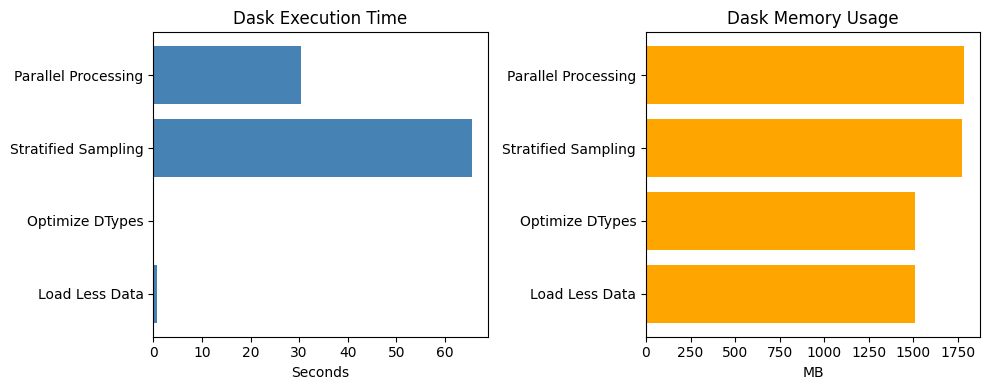

In [23]:
import matplotlib.pyplot as plt

# Define Dask optimization strategies and performance metrics
strategies = [
    "Load Less Data",
    "Optimize DTypes",
    "Stratified Sampling",
    "Parallel Processing"
]

# Update these values based on your actual benchmark results if they differ
execution_times = [0.69, 0.03, 65.52, 30.35]  # in seconds
memory_usage = [1505.9258, 1505.9258, 1769.5781, 1783.9609]     # in MB

# Plotting
plt.figure(figsize=(10, 4))

# Execution Time Bar Chart
plt.subplot(1, 2, 1)
plt.barh(strategies, execution_times, color="steelblue")
plt.xlabel("Seconds")
plt.title("Dask Execution Time")

# Memory Usage Bar Chart
plt.subplot(1, 2, 2)
plt.barh(strategies, memory_usage, color="orange")
plt.xlabel("MB")
plt.title("Dask Memory Usage")

plt.tight_layout()
plt.show()
